# Linear Regression

This notebook will hopefully contain everything I find figure out about Linear Regression. Although I have learned this multiple times, however this notebook is more to make this knowledge concrete with fundamentals. This will keep changing as I learn and connect more dots.

## Statistics view of Linear Regression
In this section we are going to study Linear Regression as applications of probability and statistics in data science.
### Linear Function
A linear function is a constant relationship between a independent variable $x$ and dependent variable $y$ and is represented by a line.
$$
y = \text{slope} * x + \text{intercept}
$$


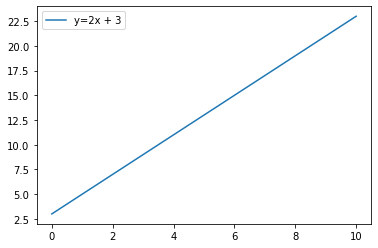

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")
plt.legend()
plt.show()


When $x$ is zero, we apply the line formula, we get the *intercept* value. In this case, intercept is 3.

The another parameter is *slope*. Slope is the steepness of the line. 
The slope is defined as the ratio of the vertical change between two points, the *rise*, to the horizontal change between the same two points, the *run*.

$$
\text{slope} = \frac{\text{rise}}{\text{run}} = \frac{\text{change in y}}{\text{change in x}}
$$

In this case the slope of the line is 2.

Now consider a case when we add a random number to the value of the function.

$$
y = \text{slope} * x + \text{intercept} + \textit{random number}
$$

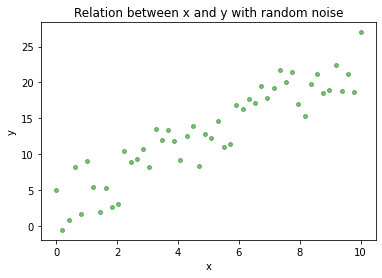

In [25]:
import random
np.random.seed(21)
x = np.linspace(0, 10)
y_vals = []
for i in range(len(x)):
    y_vals.append(2*x[i] + 3 + random.randint(-4, 4))
y = np.array(y_vals)
area = np.pi*5
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.title('Relation between x and y with random noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Our data is not really a line anymore, but it does show some linear behavior visually. As the value of x increases, y also increases. 

The real world data may exhibit such linear behavior in similar way, there is always some noise or randomness in the data.

We don't know that relationship (i.e. like equation in above case). 

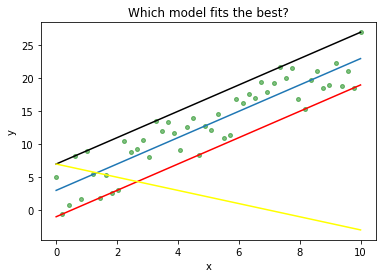

In [34]:
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")
plt.plot(x,  2 * x - 1, linestyle='solid', c='red', label="y=2x - 1")
plt.plot(x,  2 * x + 7, linestyle='solid', c='black', label="y=2x + 7")
plt.plot(x,  -x + 7, linestyle='solid', c='yellow', label="y=-x + 7")
plt.title('Which model fits the best?')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The goal is then to determine this relationship, 
* Is it linear? (let's assume it is for now)
* If so what is the best line which fits this data i.e. the best model to represent this data.(red, blue, black or yellow)
* What is the criteria to choose the best model?
* What are the parameters of the model?

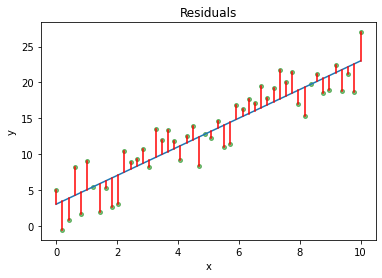

In [42]:
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")


# now add individual line for each point
for i in range(len(x)):
    lineXdata = (x[i], x[i]) # same X
    lineYdata = ((2*x[i]+3), y[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='red')


plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In this plot, the data are green dots, and the model is the blue line. The red lines called *residuals* represent the distance between the data and the model. Intuitively, the smaller the residuals the better the model is i.e. closer it is to the real data. Therefore, if we calculate all the residuals add them up, we can start looking for the slope and intercept that minimize the residuals. This is the foundation of many data science algorithms. We try to find the model parameters which minimizes the distance between the model prediction and the real data.

### Probability and Linear Regression
- An interesting link between probability and linear model is that to apply this model to data you need to ensure that the distribution of the residuals is normal with constant variance. 
- If the data doesn't show this pattern, the linear model might not be a good fit.

Let's verify this using code. We will code the linear regression from scratch below, but here we will just use `scipy` to see the normal distribution of residuals. We will use an artificial dataset of hours of study and examination score to see if we can predict the score based on hours of study.

In [47]:
hours_of_study = np.array([4, 8, 8, 12, 8, 9, 6, 11, 13, 13, 19, 16, 17, 17, 21, 21, 23, 27, 30, 24])
scores = [52, 54, 61, 63, 63, 60, 61, 70, 75, 77, 76, 79, 81, 83, 85, 86, 88, 90, 95, 93]

# Import the linregress() function
from scipy.stats import linregress

# Get the model parameters
slope, intercept, r_value, p_value, std_err = linregress(hours_of_study, scores)

# Print the linear model parameters
print('slope:', slope)
print('intercept:', intercept)

slope: 1.715259850957089
intercept: 48.27076128780868


Reiterating above statements in another words:

To implement a linear model we must study the residuals, which are the distances between the predicted outcomes and the data.

Three conditions must be met:

- The mean should be 0.
- The variance must be constant.
- The distribution must be normal.

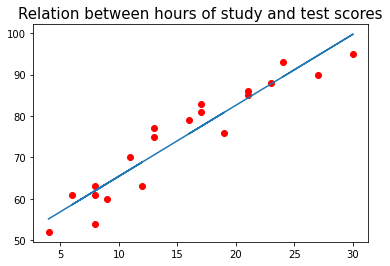

In [52]:
# Scatterplot of hours of study and test scores
plt.scatter(hours_of_study, scores, color='r')

# Plot of hours_of_study and predicted values
plt.plot(hours_of_study, slope*(hours_of_study) + intercept)
plt.title("Relation between hours of study and test scores", fontsize=15)
plt.show()

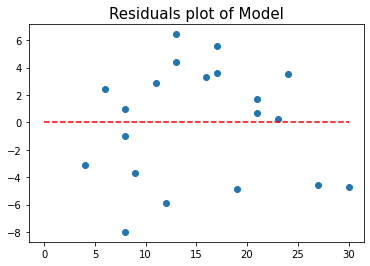

In [54]:
# Let's make a scatter plot of residuals with hours of study.
residuals = scores - (slope*(hours_of_study) + intercept)
plt.scatter(hours_of_study, residuals)

# Also add a reference line and title
plt.hlines(0, 0, 30, colors='r', linestyles='--')
plt.title("Residuals plot of Model", fontsize=15)
plt.show()

Let's take another dataset.

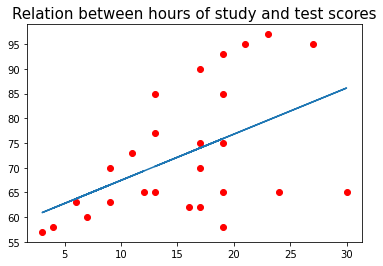

0.9334661354581673 58.11075697211155


In [66]:
hours_of_study_2 = np.array([4, 9, 7, 12, 3, 9, 6, 11, 13, 13, 19, 16, 17, 17, 13, 21, 23, 27, 30, 24, 17, 17, 19, 19, 19, 19])
scores_2 = np.array([58, 70, 60, 65, 57, 63, 63, 73, 65, 77, 58, 62, 62, 90, 85, 95, 97, 95, 65, 65, 70, 75, 65, 75, 85, 93])

# Scatterplot of hours of study and test scores
plt.scatter(hours_of_study_2, scores_2, color='r')


# Get the model parameters
slope, intercept, r_value, p_value, std_err = linregress(hours_of_study_2, scores_2)


# Plot of hours_of_study and predicted values
plt.plot(hours_of_study_2, (slope * hours_of_study_2 + intercept))
plt.title("Relation between hours of study and test scores", fontsize=15)
plt.show()


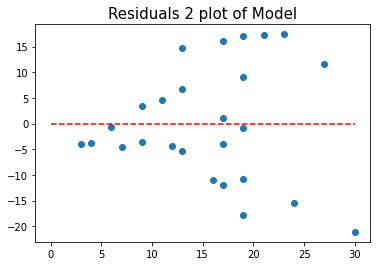

In [68]:
residuals_2 = scores_2 - (slope*(hours_of_study_2) + intercept)
plt.scatter(hours_of_study_2, residuals_2)

# Also add a reference line and title
plt.hlines(0, 0, 30, colors='r', linestyles='--')
plt.title("Residuals 2 plot of Model", fontsize=15)
plt.show()


After fitting a linear model, the residuals should look as in case 1. They should not have a structure. model_B shows a non-constant variance, and therefore the residual distribution is not normal. In those cases a linear model should not be trusted; your model could make really bad predictions!